In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load your data set
df = pd.read_csv('mobile_price_1.csv')

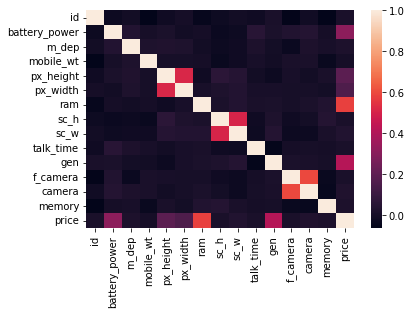

In [3]:
# Calculate the pairwise correlations
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [4]:
### 2) we can see that the features that are correlated with the device price are battery power, generation, px_height and px_width, and ram 

In [5]:
### 3) 

In [6]:
### 4) 

In [7]:
plot_data = df[['battery_power', 'gen', 'ram', 'px_width', 'px_height', 'price', 'speed', 'cores', 'bluetooth', 'wifi']].copy()

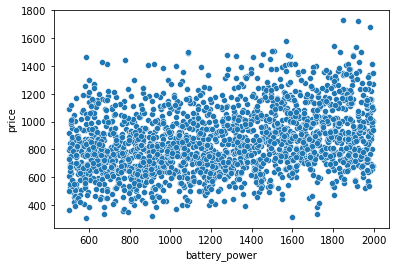

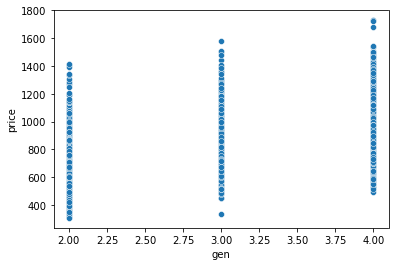

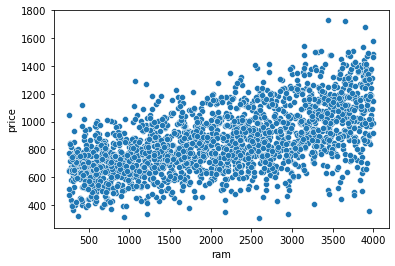

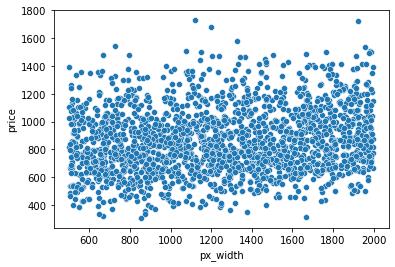

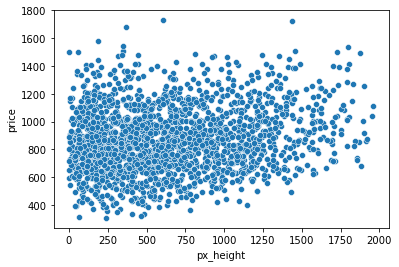

In [8]:
features = ['battery_power', 'gen' , 'ram' , 'px_width' , 'px_height']
# Iterate over the list of features
for feature in features:
  # Create a scatterplot of the feature and the price
  sns.scatterplot(x=feature, y='price', data=plot_data)
  plt.show()

In [9]:
###task 2 ordinal features are - speed, cores sim

# Select the ordinal feature speed
ordinal_feature_speed = 'speed'

# Create a dictionary mapping the original values to the ordered values
ordinal_mapping_speed = {'low': 1, 'medium': 2, 'high': 3}

# Add a new column to the dataframe with the ordered values
plot_data[ordinal_feature_speed + '_ord'] = plot_data[ordinal_feature_speed].apply(lambda x: ordinal_mapping_speed[x])

# Select the ordinal feature speed
ordinal_feature_cores = 'cores'

# Create a dictionary mapping the original values to the ordered values
ordinal_mapping_cores = {'single': 1, 'dual': 2, 'triple' : 3, 'quad' : 4 , 'penta' : 5, 'hexa': 6, 'hepta':7 , 'octa' : 8}

# Add a new column to the dataframe with the ordered values
plot_data[ordinal_feature_cores + '_ord'] = plot_data[ordinal_feature_cores].apply(lambda x: ordinal_mapping_cores[x])


In [10]:
df['cores'].unique()

array(['dual', 'triple', 'penta', 'hexa', 'single', 'octa', 'quad',
       'hepta'], dtype=object)

In [11]:
###nominal features :
### bluetooth, gen, cores, sim, f_camera, camera
### memory, screen, wifi

In [12]:
# Select the nominal feature
nominal_feature_bluetooth = 'bluetooth'

# Add a new column to the dataframe with binary values
plot_data[nominal_feature_bluetooth + '_bin'] = plot_data[nominal_feature_bluetooth].apply(lambda x: 1 if x == 'Yes' else 0)

In [13]:
# Perform one-hot encoding of the nominal feature
one_hot_gen = pd.get_dummies(plot_data['gen'], prefix='gen')

# Add the one-hot encoded columns to the dataframe
plot_data = pd.concat([plot_data, one_hot_gen], axis=1)

In [14]:
# Perform one-hot encoding of the nominal feature
one_hot_cores = pd.get_dummies(plot_data['cores'], prefix='cores')

# Add the one-hot encoded columns to the dataframe
plot_data = pd.concat([plot_data, one_hot_cores], axis=1)

In [15]:
# Perform one-hot encoding of the nominal feature
one_hot_screen = pd.get_dummies(df['screen'], prefix='screen')

# Add the one-hot encoded columns to the dataframe
plot_data = pd.concat([plot_data, one_hot_screen], axis=1)

In [16]:
# Perform one-hot encoding of the nominal feature
one_hot_wifi = pd.get_dummies(df['wifi'], prefix='wifi')

# Add the one-hot encoded columns to the dataframe
plot_data = pd.concat([plot_data, one_hot_wifi], axis=1)

In [17]:
plot_data

,battery_power,gen,ram,px_width,px_height,price,speed,cores,bluetooth,wifi,...,cores_quad,cores_single,cores_triple,screen_LCD,screen_Touch,wifi_a,wifi_b,wifi_g,wifi_n,wifi_none
0,842,2,2549,756,20,751.64,medium,dual,No,g,...,0,0,0,1,0,0,0,1,0,0
1,1021,4,2631,1988,905,885.17,low,triple,Yes,none,...,0,0,1,0,1,0,0,0,0,1
2,563,4,2603,1716,1263,1067.78,low,penta,Yes,none,...,0,0,0,0,1,0,0,0,0,1
3,615,3,2769,1786,1216,819.22,high,hexa,Yes,none,...,0,0,0,1,0,0,0,0,0,1
4,1821,4,1411,1212,1208,1023.13,medium,dual,Yes,none,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,4,668,1890,1222,729.34,low,hexa,Yes,none,...,0,0,0,0,1,0,0,0,0,1
1996,1965,3,2032,1965,915,1157.94,high,quad,Yes,n,...,1,0,0,0,1,0,0,0,1,0
1997,1911,4,3057,1632,868,1351.51,low,octa,No,none,...,0,0,0,0,1,0,0,0,0,1
1998,1512,4,869,670,336,846.52,low,penta,No,g,...,0,0,0,0,1,0,0,1,0,0


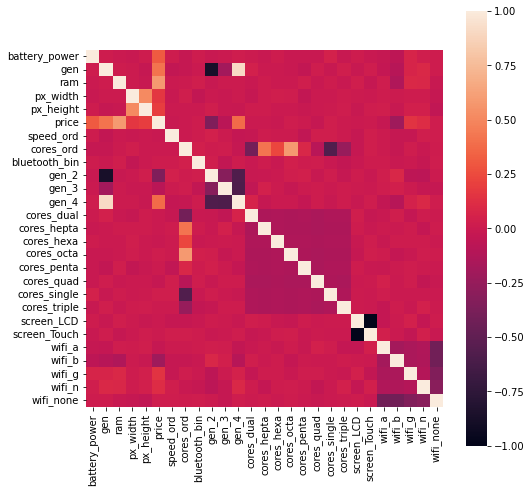

In [18]:
corr = plot_data.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns ,square=True,)
plt.show()

In [19]:
###task 3

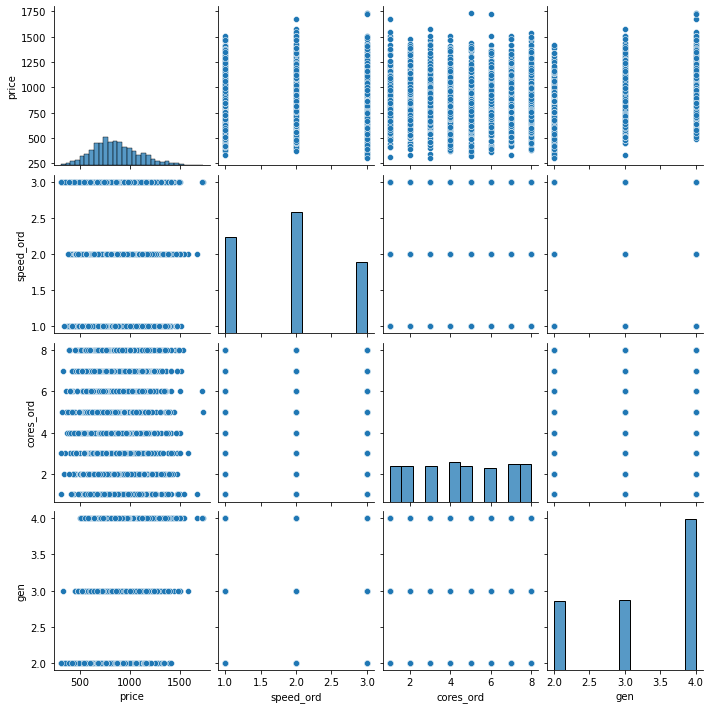

In [20]:
# Create a pairplot of the selected features
features = ['price', 'speed_ord', 'cores_ord','gen']
sns.pairplot(plot_data, vars=features)

<AxesSubplot:xlabel='px_width', ylabel='px_height'>

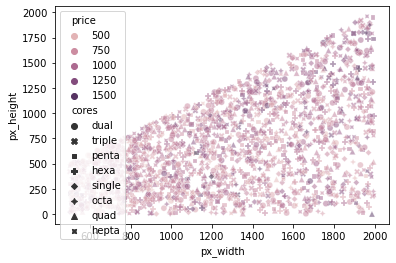

In [21]:
features = ['px_width', 'px_height', 'price', 'cores']

# Create a scatterplot matrix of the selected features
sns.scatterplot(data=plot_data, x='px_width', y='px_height', hue='price', style='cores', alpha=0.5)